In [1]:
import numpy as np
import glob
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from sklearn.model_selection import train_test_split

In [2]:
tumor=[]
path="./dataset/Brain Tumor/*.jpg"
for f in glob.iglob(path):
    img=cv2.imread(f)
    img=cv2.resize(img,(128,128))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    tumor.append(img)
if len(tumor) > 2080:
    tumor = random.sample(tumor, 2080)

In [25]:
len(tumor)
# tumor[0].shape

2080

In [3]:
healthy=[]
path="./dataset/Healthy/*.jpg"
for f in glob.iglob(path):
    img=cv2.imread(f)
    img=cv2.resize(img,(128,128))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    healthy.append(img)

In [6]:
len(healthy)


2080

In [4]:
healthy=np.array(healthy)
tumor=np.array(tumor)
all=np.concatenate((tumor,healthy))
healthy_labels=np.zeros(len(healthy))
tumor_labels=np.ones(len(tumor))
data = np.concatenate((healthy, tumor), axis=0)  # Combine images
labels = np.concatenate((healthy_labels, tumor_labels), axis=0)
data = data.astype('float32') / 255.0

From Sklearn we are splitting our dataset into train and validate ...VALIDATE IS USED FOR TESTING THE OUTPUT OF THE DATASET

In [5]:
x_train,x_val,y_train,y_val=train_test_split(data,labels,test_size=0.2,random_state=42)


NOW LETS PLOT THE DATASET RANDOMLY USING RANDOM FUNCTION 

In [6]:
%matplotlib inline
def plot_random(healthy, tumor, num=5):
    healthy_images = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_images = tumor[np.random.choice(tumor.shape[0], num, replace=False)]
    
    # Plot healthy images
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title(f'Healthy {i+1}')
        plt.imshow(healthy_images[i])
    plt.show()

    # Plot tumor images
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title(f'Tumor {i+1}')
        plt.imshow(tumor_images[i])
    plt.show()


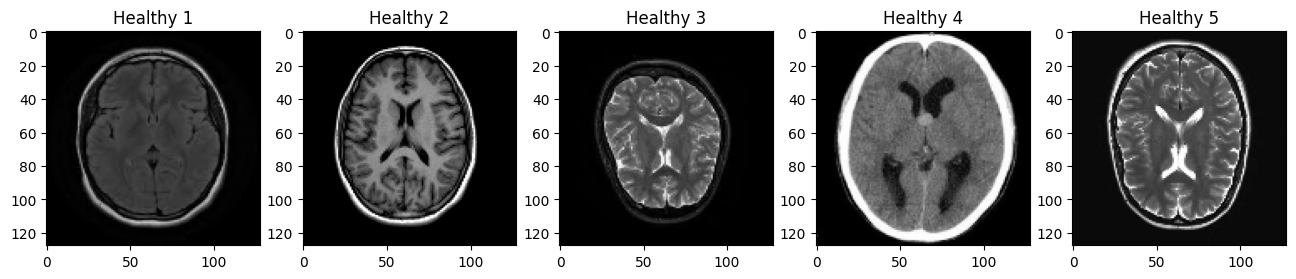

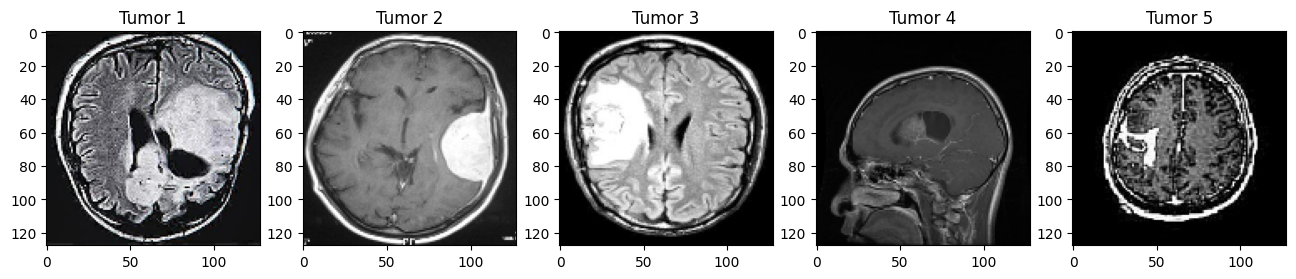

In [14]:
# idx=random.randint(1,len(all))
# plt.imshow(all[idx,:])
# plt.show()
plot_random(healthy=healthy,tumor=tumor,num=5)

In [7]:
from tensorflow.keras.optimizers import Adam
model=Sequential([
  Conv2D(48, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((3, 3)),
    Dropout(0.5),

    Conv2D(96, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((3, 3)),
    Dropout(0.5),

    Conv2D(192, (2, 2), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((3, 3)),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
 
])


c:\Users\ss044\anaconda3\envs\cnn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, Flatten, Dense

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
#     Flatten(),
#     Dense(1, activation='sigmoid')
# ])
# model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 508032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │       508,033 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 508,929 (1.94 MB)

 Trainable params: 508,929 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# import tensorflow as tf
# print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [11]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history=model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 92s 858ms/step - accuracy: 0.6819 - loss: 0.5920 - val_accuracy: 0.5240 - val_loss: 4.1885
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 133s 774ms/step - accuracy: 0.7339 - loss: 0.4988 - val_accuracy: 0.5216 - val_loss: 3.1067
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 78s 754ms/step - accuracy: 0.7581 - loss: 0.4637 - val_accuracy: 0.5481 - val_loss: 2.0224
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 82s 789ms/step - accuracy: 0.7767 - loss: 0.4288 - val_accuracy: 0.6923 - val_loss: 0.9097
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 78s 748ms/step - accuracy: 0.8150 - loss: 0.3845 - val_accuracy: 0.7464 - val_loss: 0.4961
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 86s 826ms/step - accuracy: 0.8211 - loss: 0.3867 - val_accuracy: 0.8413 - val_loss: 0.3486
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 87s 839ms/step - accuracy: 0.8281 - loss: 0.3945 - val_accuracy: 0.8293 - val_loss: 0.3850
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 90s 866ms/step - accuracy: 0.8389 - loss: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.8295 - loss: 0.3603
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step


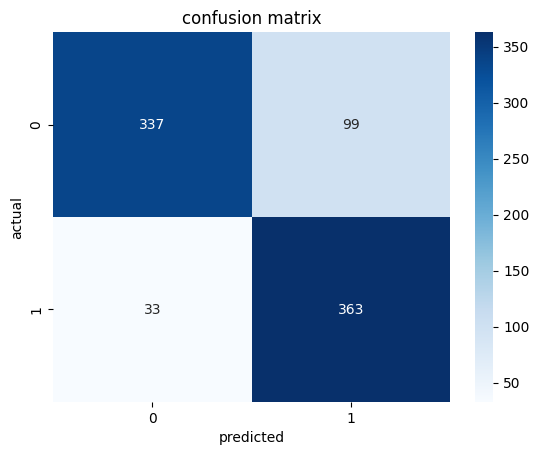

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import seaborn as sns
val_loss,val_accuracy =model.evaluate(x_val,y_val)
y_pred=model.predict(x_val)
y_pred=(y_pred>0.5).astype(int)
report=classification_report(y_val,y_pred,output_dict=True)
report_df=pd.DataFrame(report).transpose()
conf_matrix=confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()



TN (True Negatives) = 413: Healthy images correctly predicted as healthy.
FP (False Positives) = 23: Healthy images incorrectly predicted as tumors.
FN (False Negatives) = 22: Tumor images incorrectly predicted as healthy.
TP (True Positives) = 374: Tumor images correctly predicted as tumors.
1. Accuracy
Accuracy is the proportion of correct predictions (both TN and TP) out of all predictions.

Accuracy = (TP + TN) / (TP + TN + FP + FN) = (374 + 413) / (374 + 413 + 23 + 22) = 787 / 832 ≈ 0.945 or 94.5%

 Precision (Tumor)
Precision is the proportion of predicted tumor cases that are actually tumor. It tells us how accurate the model is when it predicts a tumor.
Precision = TP / (TP + FP) = 374 / (374 + 23) = 374 / 397 ≈ 0.941 or 94.1%

Recall (Tumor)
Recall is the proportion of actual tumor cases that are correctly identified. It tells us how good the model is at detecting all the tumor cases.

Recall = TP / (TP + FN) = 374 / (374 + 22) = 374 / 396 ≈ 0.944 or 94.4

. F1-Score (Tumor)
The F1-score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall.
F1-score = 2 × (Precision × Recall) / (Precision + Recall) = 2 × (0.941 × 0.944) / (0.941 + 0.944) ≈ 0.942 or 94.2%



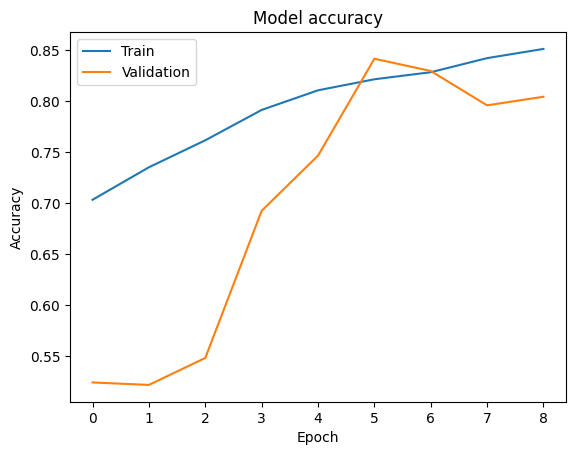

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


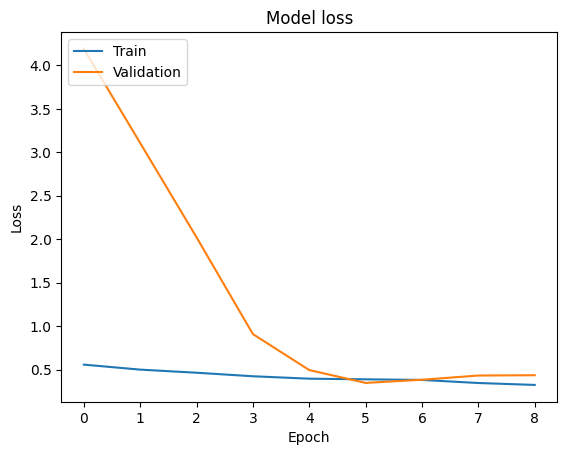

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step


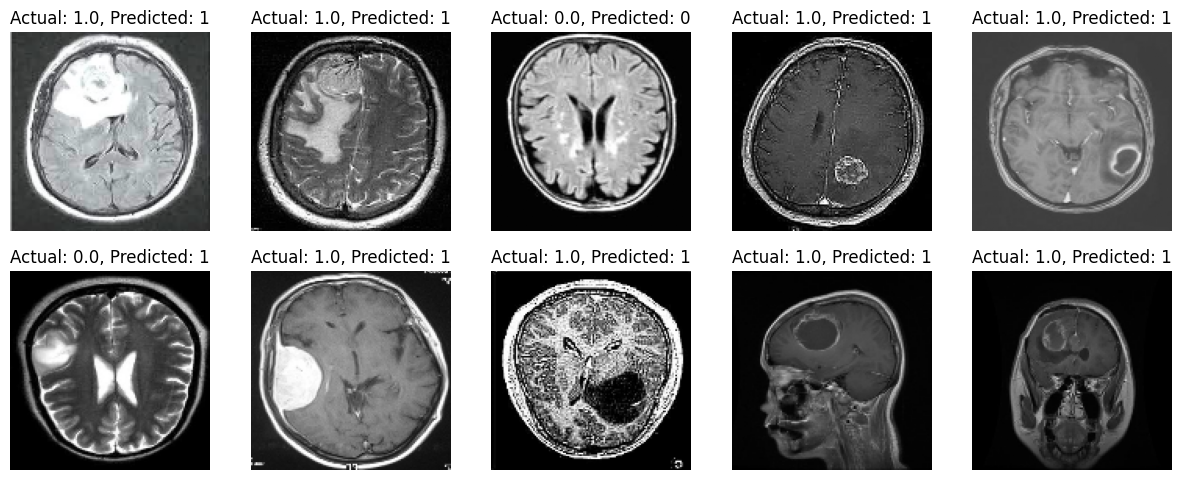

In [ ]:
y_pred = model.predict(x_val)
y_pred_classes = (y_pred > 0.5).astype("int32")  


num_samples = 10 
plt.figure(figsize=(15, 15))
for i in range(num_samples):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_val[i])
    plt.title(f'Actual: {y_val[i]}, Predicted: {y_pred_classes[i][0]}')
    plt.axis('off')
plt.show()
